# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import sgd

Using TensorFlow backend.


In [4]:
from IPython.display import HTML

# Data processing

In [5]:
# Load the data
train = pd.read_csv("data/train/train.csv")
train.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test = pd.read_csv("data/test/test.csv")
test.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
Y_train = train["label"]
Y_train.head(5)

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

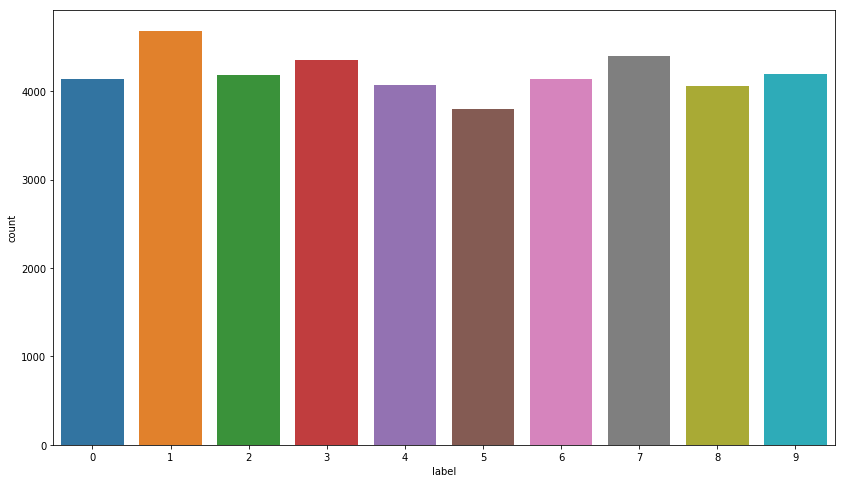

In [8]:
# Drop 'label' column
X_train = train.drop(labels = ["label"], axis = 1) 

# free some space
del train 

plt.figure(figsize=(14,8))
f = sns.countplot(Y_train)
plt.show()

In [9]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0

In [10]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X_train = X_train.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)
X_train.shape

(42000, 28, 28, 1)

In [11]:
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_train = to_categorical(Y_train, num_classes = 10)
print(Y_train.shape)

(42000, 10)


In [12]:
# Set the random seed
random_seed = 2

# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)

(37800, 28, 28, 1)
(37800, 10)
(4200, 28, 28, 1)
(4200, 10)


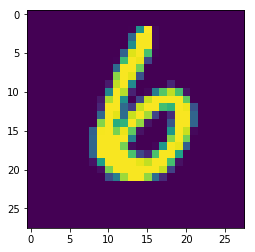

In [15]:
# Some examples
f = plt.imshow(X_train[200][:,:,0])

# Convolutional theory

## CNN Example configuration

In [16]:
imgadd = '<img src="https://shafeentejani.github.io/assets/images/convolutional_neural_network.png", width=800>'
HTML(imgadd)

## The convolution operation

In [17]:
imgadd = '<img src="https://shafeentejani.github.io/assets/images/convolution.gif", width=800>'
HTML(imgadd)

## The Max-pooling operation

In [18]:
imgadd = '<img src="https://shafeentejani.github.io/assets/images/pooling.gif", width = 500>'
HTML(imgadd)

## Backpropagation (Gradient Descent)

In [19]:
imgadd = '<img src="https://alykhantejani.github.io/images/gradient_descent_line_graph.gif" alt="20 steps of gradient descent with learning rate 0.01" width=900>'
HTML(imgadd)

In [ ]:
BACKPROP_LINK = 'https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/'

# Convolutional Neural Network (CNN) Configuration

In [20]:
# Set the CNN model 

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
__________

In [21]:
opt = sgd(lr=0.001, momentum=0, nesterov=False)

In [22]:
# Compile the model
model.compile(optimizer = opt, loss = "categorical_crossentropy", metrics=["accuracy"])

# CNN Training setup

In [23]:
epochs = 30 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 64

In [24]:
hist = model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, Y_val))

with open('models/hist_30_epoch_mnist_mdl_v2', 'wb') as file_pi:
        pickle.dump(hist.history, file_pi)
        
file_pi.close()

Train on 37800 samples, validate on 4200 samples
Epoch 1/30
37800/37800 [==============================] - 43s - loss: 2.2631 - acc: 0.1746 - val_loss: 2.2093 - val_acc: 0.4555
Epoch 2/30
37800/37800 [==============================] - 43s - loss: 2.1434 - acc: 0.3066 - val_loss: 2.0049 - val_acc: 0.6307
Epoch 3/30
33344/37800 [=========================>....] - ETA: 4s - loss: 1.8626 - acc: 0.4360

KeyboardInterrupt: 

In [ ]:
# Save model
model.save('models/30_epoch_mnist_mdl_v2.h5')

In [25]:
model_1 = load_model('models/30_epoch_mnist_mdl.h5')

model_1_hist_obj = open('models/hist_30_epoch_mnist_mdl', 'rb')  
model_1_hist = pickle.load(model_1_hist_obj) 

model_1_hist_obj.close()

# CNN Visualization

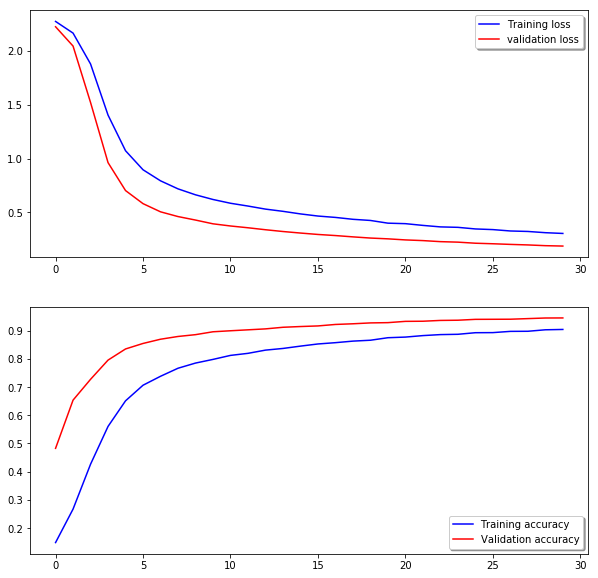

In [26]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1, figsize=(10, 10))
ax[0].plot(model_1_hist['loss'], color='b', label="Training loss")
ax[0].plot(model_1_hist['val_loss'], color='r', label="validation loss", axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(model_1_hist['acc'], color='b', label="Training accuracy")
ax[1].plot(model_1_hist['val_acc'], color='r', label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
weights = model.get_weights()